# Explore exercises

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [1]:
import requests
import pandas as pd
import os

import prepare as prep
import acquire as ac


import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [2]:
power = ac.get_opds()

In [3]:
items = ac.get_items()

In [4]:
'''
def splitter(df, start= None, train_end_split=None, val_end_split=None, end=None, method='loc', ratio=[60,20,20]):
    if method == 'loc':
        train = df.loc[start : train_end_split]
        val = df.loc[train_end_split : val_end_split]
        test = df.loc[val_end_split : end]
        print(f'train {train.shape}, val {val.shape}, test {test.shape}')
        return train, val, test
    if method == 'iloc':
        length = len(df)
        tr = round((ratio[0]/100) * length)
        v = round((ratio[1]/100) * length) + tr
        train = df.iloc[start : tr-1]
        val = df.iloc[tr : v-1]
        test = df.iloc[v : end]
        print(f'train {train.shape}, val {val.shape}, test {test.shape}')
        return train, val, test
'''
print()

In [5]:
power

,consumption,wind,solar,wind_solar
date,,,,
2006-01-01,1069.18400,0.000,0.000,0.000
2006-01-02,1380.52100,0.000,0.000,0.000
2006-01-03,1442.53300,0.000,0.000,0.000
2006-01-04,1457.21700,0.000,0.000,0.000
2006-01-05,1477.13100,0.000,0.000,0.000
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [48]:
power = ac.get_opds()
power, val, test = prep.splitter(power, train_end='2013', val_start='2014', val_end='2015', test_start='2016')

train (2922, 4), val (730, 4), test (731, 4)


In [47]:
power = ac.get_opds()
power, val, test = prep.splitter(power, method='iloc', ratio=[60,20,20])

train (2629, 4), val (876, 4), test (876, 4)


In [9]:
power.head()

,consumption,wind,solar,wind_solar
date,,,,
2006-01-01,1069.184,0.0,0.0,0.0
2006-01-02,1380.521,0.0,0.0,0.0
2006-01-03,1442.533,0.0,0.0,0.0
2006-01-04,1457.217,0.0,0.0,0.0
2006-01-05,1477.131,0.0,0.0,0.0


In [10]:
def distributions(df):
    for col in df.columns:
        plt.figure(figsize=(8,6))
        sns.histplot(df[col])
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

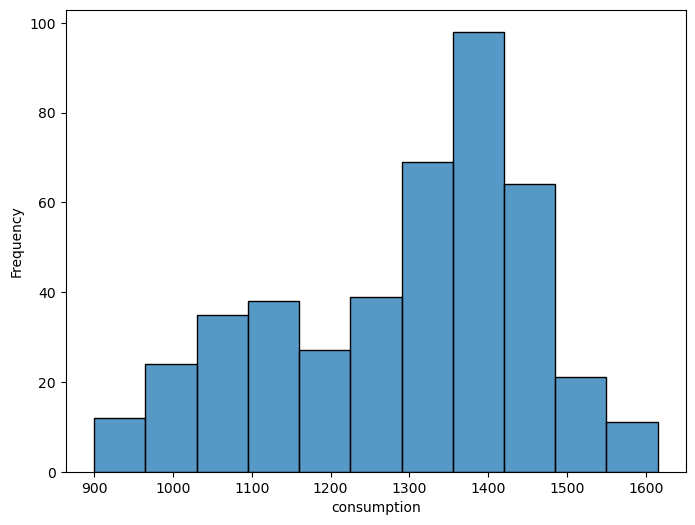

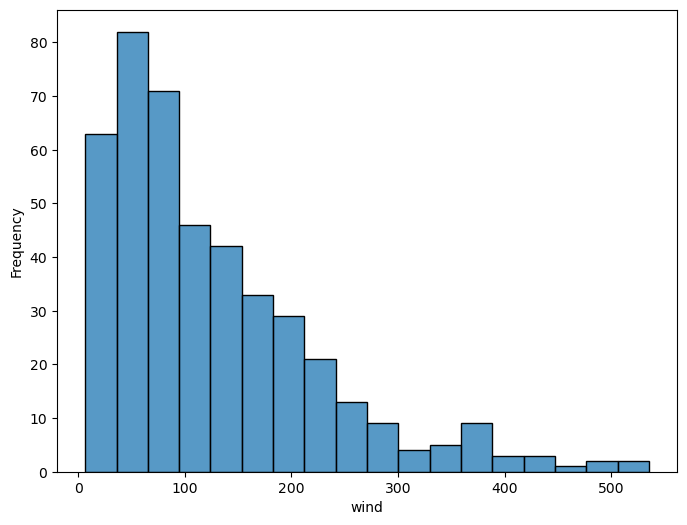

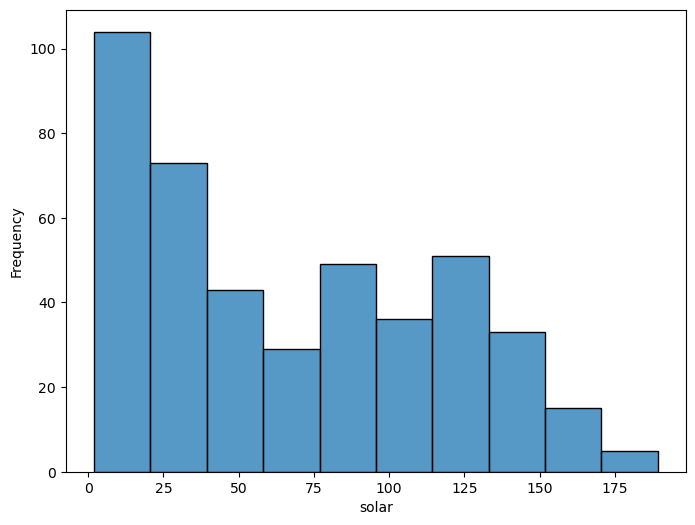

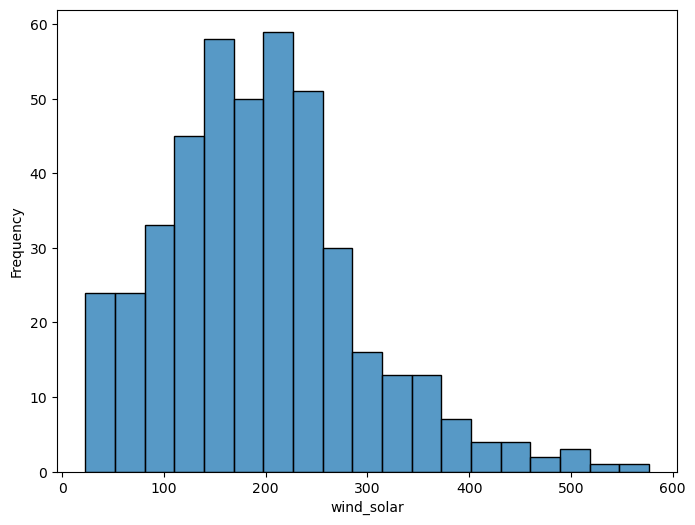

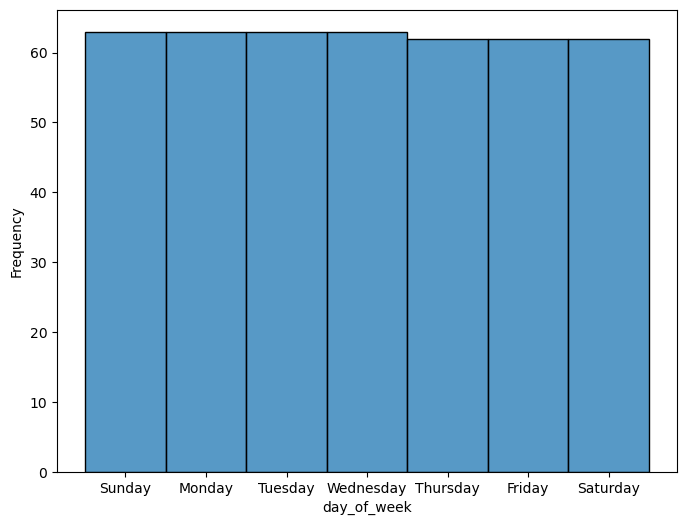

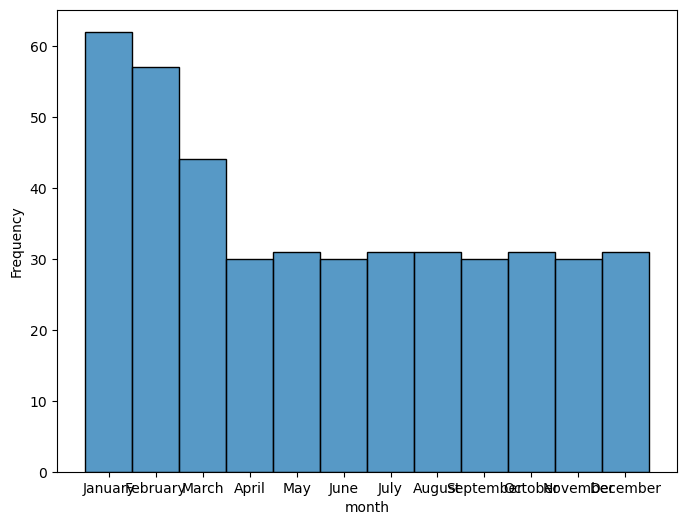

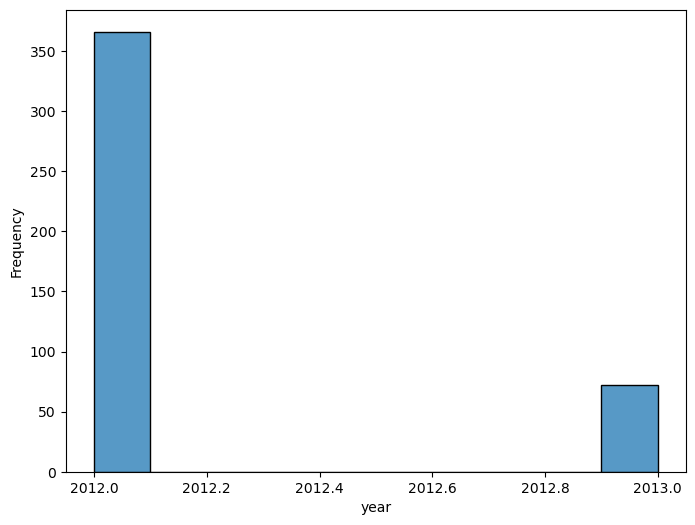

In [19]:
distributions(power[(power.solar > 0) & (power.wind > 0)])

In [13]:
power = prep.add_cols(power)

In [14]:
power.head()

,consumption,wind,solar,wind_solar,day_of_week,month,year
date,,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,Sunday,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,Monday,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,Tuesday,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,Wednesday,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,Thursday,January,2006


<Axes: xlabel='consumption', ylabel='day_of_week'>

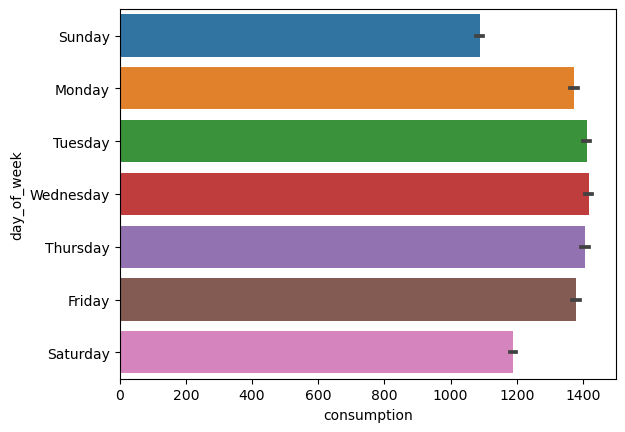

In [15]:
sns.barplot(power, x='consumption', y='day_of_week')

<Axes: xlabel='consumption', ylabel='month'>

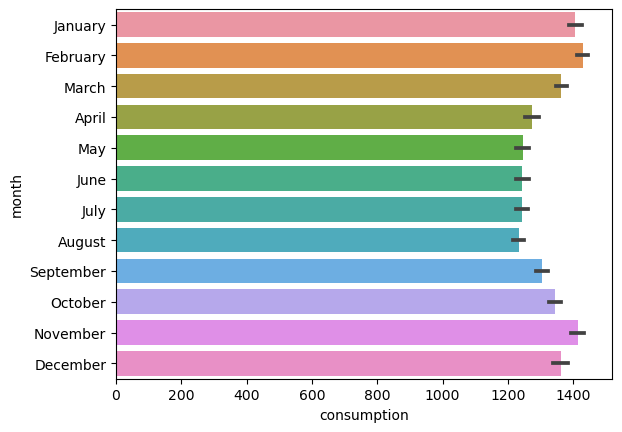

In [16]:
sns.barplot(power, x='consumption', y='month')

<Axes: xlabel='year', ylabel='consumption'>

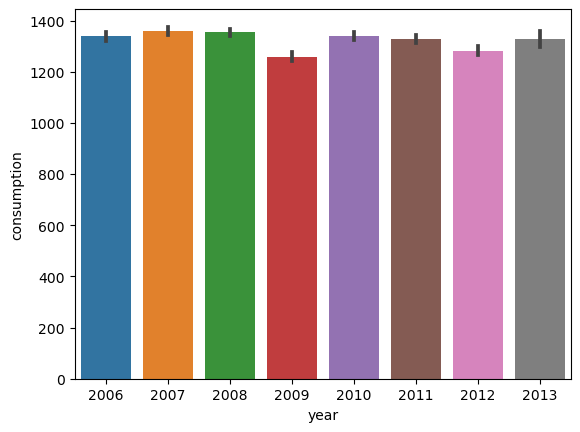

In [17]:
sns.barplot(power, x='year', y='consumption')

In [41]:
def trends(df, col, dd=True, ww=True, mm=False, yy=False):
    days = df.resample('d')[col].mean()
    weeks = df.resample('w')[col].mean()
    months = df.resample('m')[col].mean()
    years = df.resample('y')[col].mean()
    
    plt.figure(figsize=(10,8))
    if dd:
        days.plot(label='Daily Average')
    if ww:
        weeks.plot(color='firebrick', label='Weekly average')
    if mm:
        months.plot(color='black', label='Monthly average')
    if yy:
        years.plot(color='purple', label='Monthly average')
    plt.ylabel(col)
    plt.legend()
    plt.show()

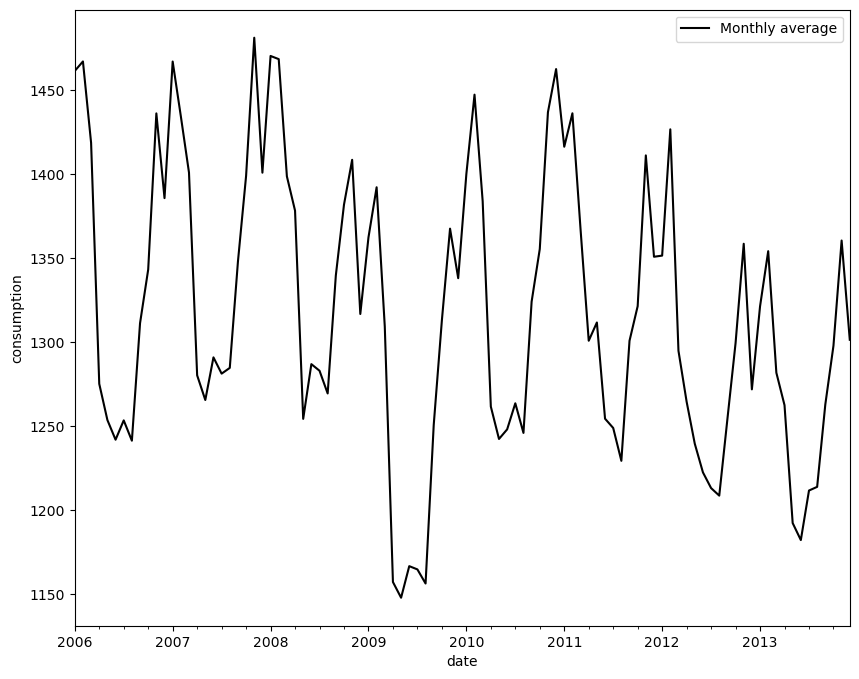

In [50]:
trends(power, 'consumption', dd=False, ww=False, mm=True)